# Imports


In [1]:
import pandas as pd

In [2]:
# Defining ratings with the ratings csv
ratings = pd.read_csv('ratings.csv')

In [3]:
print(ratings.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


## Descovering the number of lines and columns of our table

---



In [4]:
print(f"Our table is actually a {type(ratings)}\n")

print(f"If we select only a column of our dataframe, then we have a {type(ratings['rating'])}\n")

print(f"Our dataframe has {ratings.shape[0]} lines and {ratings.shape[1]} columns")

Our table is actually a <class 'pandas.core.frame.DataFrame'>

If we select only a column of our dataframe, then we have a <class 'pandas.core.series.Series'>

Our dataframe has 100836 lines and 4 columns


## Let's find out **the range of ratings we have**

In [5]:
range_of_ratings = ratings['rating'].unique()

- Here we can see our ratings go from 5.0 to 0.5

### Some conclusions
- It doesn't mean we have ratings that don't reach 0, it only means **no movie had a 0 rating**

In [6]:
range_of_ratings

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

## Exploring how to plot the data


<Axes: >

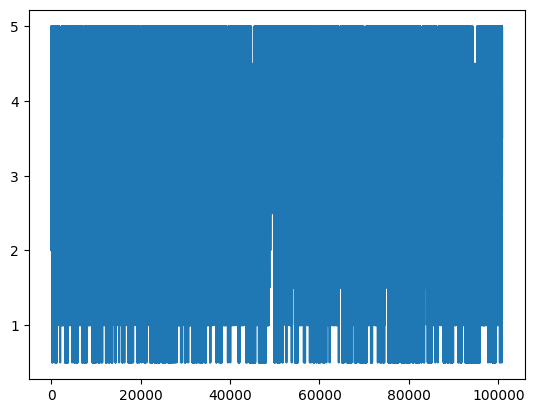

In [7]:
ratings['rating'].plot()
# Not so useful...

<Axes: ylabel='Frequency'>

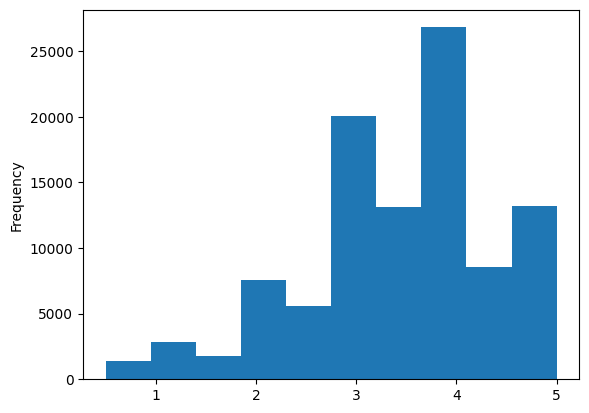

In [8]:
ratings['rating'].plot(kind='hist')
# Way better

- Here we just saw the importance of the **geometric component**
- Here, a histogram is way better. Since, even tough the range of ratings is small, the ammout of times each one is shown is large and **the histogram allow us to easily see the more frequent ratings**

## Discovering more important data for our project
- Here we will find, trough describe and specific Series functions:
  - Mean
  - Median
  - Count
  - Min and max values
  - 25% and 75% marks
- All of this from our **rating column** from our ratings dataframe

In [9]:
print(f"Our ratings mean is {ratings['rating'].mean()} and the median is {ratings['rating'].median()}")

Our ratings mean is 3.501556983616962 and the median is 3.5


In [10]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

# Importing seaborn for more complex data plotting

In [11]:
import seaborn as sns

## Plotting data from rating series in a boxplot format

- Here we can get **important insights** from the graph
  1. The median (line in the middle of the blue box)
  2. The 25% to 50% mark of ratings (first line in the blue box to the middle one)
  3. The 50% to 75% mark of ratings (middle line in the blue box to the last line in the box)
  4. Most of our ratings are ranging from 3 to 4 (25% to 75% mark)
  
## How to read the graph
- A boxplot, also called a box and whisker plot, is a way to show the spread and centers of a data set.
- Measures of spread include the interquartile range and the mean of the data set.
- Measures of center include the mean or average and median (the middle of a data set).

### In our graph

- The minimum is the first black circle show (0.5)
- The max is the last line in the graph
- **Q1** -> 1.5 to 3.0 (first line in the graph)
- **Q2** -> 3.0 to 3.5 (first blue box line in the graph)
- **Median** -> 3.5 (middle blue box line in the graph)
- **Q3** -> 3.5 to 4.0 (middle blue box line to last blue box line)
- **Q4** -> 4.0 to 5.0 (last blue box line to last line in the graph)





<Axes: ylabel='rating'>

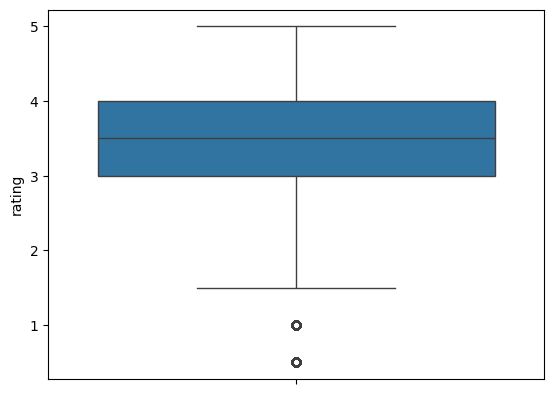

In [12]:
sns.boxplot(ratings['rating'])

# Exploratory Analysis with Movies.csv

In [13]:
movies = pd.read_csv("movies.csv")

In [14]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


- Here we're **querying our ratings dataframe**. Basically, we're asking to bring all the rows with the column **movieId with the value 1**
- Once the rows corresponding to movieId 1 are selected, we select just the column named "rating"


In [15]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [16]:
ratings.query("movieId==1")['rating']

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: rating, Length: 215, dtype: float64

- Getting the mean from all the ratings of the movie with movieId 1.

In [17]:
ratings.query("movieId==1")['rating'].mean()

3.9209302325581397

- Here we are grouping all the data by movieId (group all movie 1 ratings in one group, the same for group 2...)
- Then, we're getting the mean of the 'rating' column by group.

In [18]:
means_by_movie = ratings.groupby("movieId").mean()["rating"]

- Creating a histogram and setting label for y axis as "Number of movies"
- We're using the histogram since it makes simple to identify the most common ratings

Text(0, 0.5, 'Number of Movies')

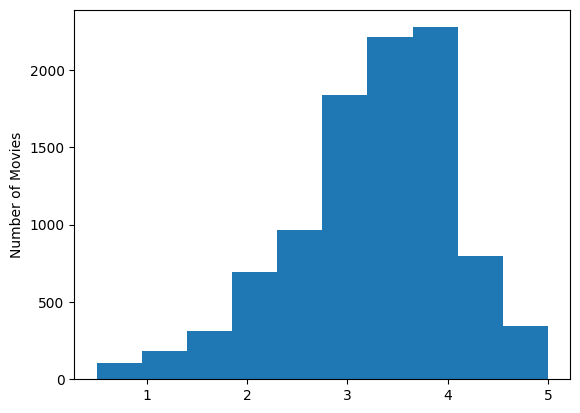

In [19]:
means_by_movie.plot(kind="hist").set_ylabel("Number of Movies")

<Axes: ylabel='rating'>

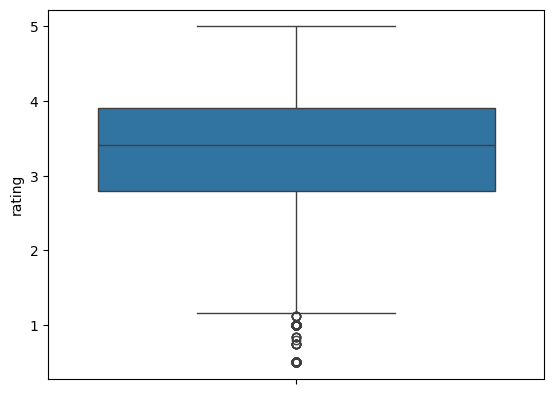

In [20]:
sns.boxplot(means_by_movie)

In [21]:
means_by_movie.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

<ipython-input-22-529afbc87ec7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(means_by_movie, bins=10)


<Axes: xlabel='rating', ylabel='Density'>

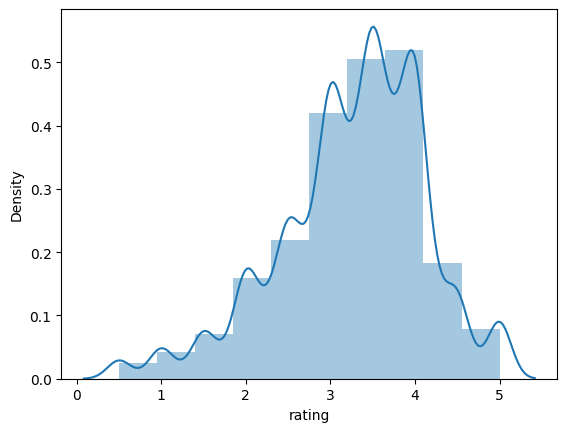

In [22]:
sns.distplot(means_by_movie, bins=10)

- Using matplotlib (lowest level lib) to create a histogram

Text(0.5, 1.0, 'Movie rating means histogram')

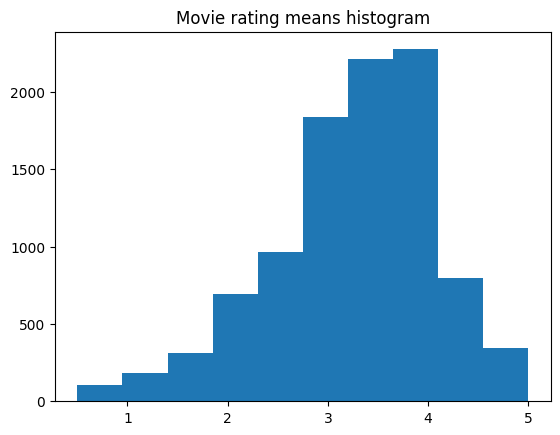

In [23]:
import matplotlib.pyplot as plt
plt.hist(means_by_movie)
plt.title("Movie rating means histogram")

# Now with tmdb and variables
(cheatsheet [right here](https://www.codecademy.com/learn/dsf-exploratory-data-analysis-python/modules/dsf-variable-types-for-data-science/cheatsheet))

- Here we can see that we not only have different columns from the other database, **but also different kinds of values.**
- With this, **let's learn how to classify our variables**

In [29]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


- Here, in 'original_language', we can see that this is a variable that recieves a predetermined value (an option from the array) and this values it's not ordenable (en !> ja nor ja !> en).
  - In this case, we have a list of categories with no order. So we say this variable is a **nominal categorical**

In [32]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

- In the budget, things are different. We choose a number that is not preset for us in any data structure.
- Here we can say we have **a continous quantitative variable**, since you can choose any numeric value to atribute to this variable.

In [34]:
tmdb['budget'][0]

237000000

- Here, however, we got a **discrete quantitative variable** here(numbers go from 0.5 to 5.0 in a .5 interval)

In [35]:
ratings['rating'][0]

4.0